# 고객 이탈 여부 (분류 모델)

In [210]:
import pandas as pd

url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

df=pd.read_csv(url)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [212]:
# ***
# TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [213]:
# TotalCharges의 Dtype(object->float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [214]:
# Churn (Yes:1, No:0)
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

df['Churn']


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [215]:
df['Churn'].isna().sum()

np.int64(0)

## baseline 데이터 및 모델 생성

In [216]:
# Features 선택
base_df =  df.select_dtypes(include=['int','float']).copy()

# 결측치 처리
base_df = base_df.dropna()
X = base_df.drop(columns=['Churn']).to_numpy()
y = base_df.Churn

# 클래스 불균형 처리
print( y.value_counts() )
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
# rus = RandomUnderSampler(random_state=42)
# X,y = rus.fit_resample(X,y)

smote = SMOTE()
X,y = smote.fit_resample(X,y)

# -------------------------------------------------
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled =  scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 모델 생성
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 모델 학습
knn.fit(x_train_scaled, y_train)

# 모델 평가
from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test, predict))

Churn
0    5163
1    1869
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1033
           1       0.76      0.77      0.76      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



## 모델 성능 개선

In [217]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [218]:
base_df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

### 주요 특성 시각화

In [219]:
import seaborn as sns

In [220]:
df = df.drop(columns=['customerID'])

In [221]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


<Axes: xlabel='gender', ylabel='count'>

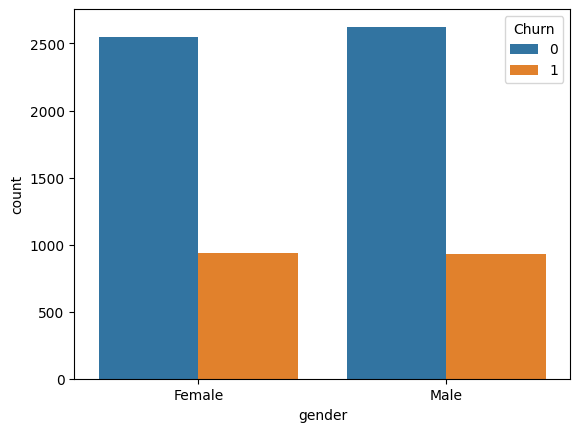

In [222]:
# 성별에 따른 이탈률
sns.countplot(data=df,x='gender',hue='Churn')
# 별로 차이가 안 남

<Axes: xlabel='Partner', ylabel='count'>

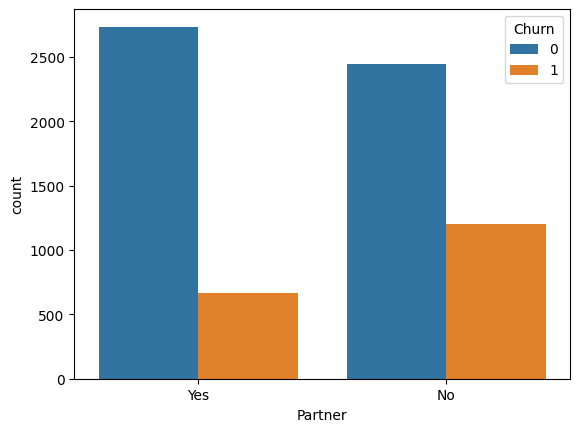

In [223]:
sns.countplot(data=df,x='Partner',hue='Churn')

<Axes: xlabel='Dependents', ylabel='count'>

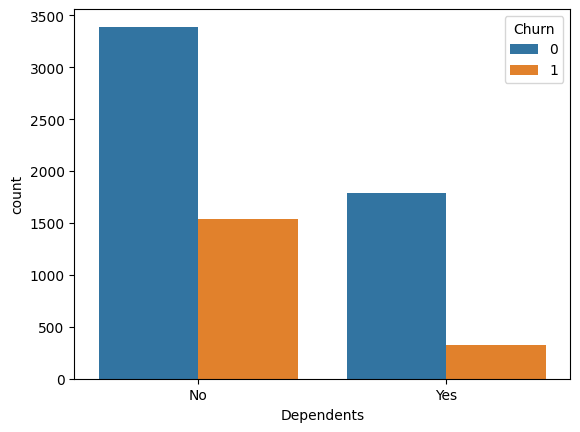

In [224]:
sns.countplot(data=df,x='Dependents',hue='Churn')
# 채택

<Axes: xlabel='PhoneService', ylabel='count'>

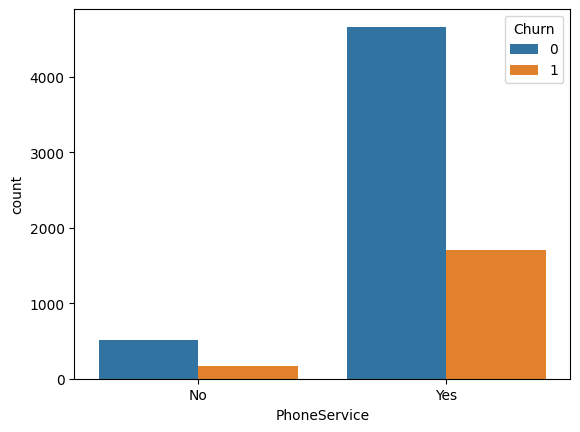

In [225]:
sns.countplot(data=df,x='PhoneService',hue='Churn')
# 채택

In [226]:
ndf = df.copy()

In [227]:
ndf=ndf.dropna()

In [228]:
# 차이를 보이는 Partner, Dependents, PhoneService를 onehot으로 변경하여 학습에 적용
ndf['Partner'] = ndf['Partner'].map({'Yes': 1, 'No': 0})
ndf['Dependents'] = ndf['Dependents'].map({'Yes': 1, 'No': 0})
ndf['PhoneService'] = ndf['PhoneService'].map({'Yes': 1, 'No': 0})

# 원-핫 인코딩
ndf = pd.get_dummies(
    ndf,
    columns=['Partner', 'Dependents', 'PhoneService'],
    prefix=['Partner', 'Dependents', 'PhoneService'],
    drop_first=False, 
    dtype=int
)

# concat은 필요 없음
ndf.head()

,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1
0,Female,0,1,No phone service,DSL,No,Yes,No,No,No,...,Electronic check,29.85,29.85,0,0,1,1,0,1,0
1,Male,0,34,No,DSL,Yes,No,Yes,No,No,...,Mailed check,56.95,1889.50,0,1,0,1,0,0,1
2,Male,0,2,No,DSL,Yes,Yes,No,No,No,...,Mailed check,53.85,108.15,1,1,0,1,0,0,1
3,Male,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,...,Bank transfer (automatic),42.30,1840.75,0,1,0,1,0,1,0
4,Female,0,2,No,Fiber optic,No,No,No,No,No,...,Electronic check,70.70,151.65,1,1,0,1,0,0,1


##### 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# imblearn.combine에서 SMOTEENN을 불러옵니다.
from imblearn.combine import SMOTEENN
# 파이프라인을 사용하면 여러 단계를 하나로 묶어 편리하게 관리할 수 있습니다.
from sklearn.pipeline import Pipeline

##### 1. 데이터 로드 및 전처리

In [ ]:
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

In [ ]:
# TotalCharges 숫자 변환 및 결측치 처리 (중앙값으로 대체)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
# 타겟 변수 Churn을 0과 1로 변환
df['Churn'] = df.Churn.map({'Yes': 1, 'No': 0})

In [ ]:
# 불필요한 customerID 컬럼 제
df = df.drop(columns=['customerID'])

##### 2. Features 엔지니어링

In [ ]:
# 'Contract' 컬럼: 요청하신 대로 순서형 인코딩
df['Contract'] = df.Contract.map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

In [ ]:
# 나머지 모든 범주형(object) 컬럼에 대해 원-핫 인코딩 적용
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [ ]:
# --- 3. 피처(X)와 타겟(y) 분리 ---
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
# --- 4. 클래스 불균형 처리 (SMOTE) ---
print("--- SMOTE 적용 전 클래스 분포 ---")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\n--- SMOTE 적용 후 클래스 분포 ---")
print(y_resampled.value_counts())


# --- 5. 데이터 분할 ---
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)


# --- 6. 스케일링 ---
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# --- 7. 모델 학습 및 평가 ---
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

predict = knn.predict(x_test_scaled)
print("\n--- 최종 분류 리포트 ---")
print(classification_report(y_test, predict))

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9648\4142519937.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


--- SMOTE 적용 전 클래스 분포 ---
Churn
0    5174
1    1869
Name: count, dtype: int64

--- SMOTE 적용 후 클래스 분포 ---
Churn
0    5174
1    5174
Name: count, dtype: int64

--- 최종 분류 리포트 ---
              precision    recall  f1-score   support

           0       0.84      0.76      0.79      1035
           1       0.78      0.85      0.81      1035

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



In [232]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# imblearn.combine에서 SMOTEENN을 불러옵니다.
from imblearn.combine import SMOTEENN
# 파이프라인을 사용하면 여러 단계를 하나로 묶어 편리하게 관리할 수 있습니다.
from sklearn.pipeline import Pipeline

# --- 1. 데이터 로드 및 기본 전처리 (이전과 동일) ---
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# TotalCharges 숫자 변환 및 결측치 처리 (중앙값으로 대체)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# 타겟 변수 Churn을 0과 1로 변환
df['Churn'] = df.Churn.map({'Yes': 1, 'No': 0})

# 불필요한 customerID 컬럼 제거
df = df.drop(columns=['customerID'])


# --- 2. 피처 엔지니어링 (이전과 동일) ---

# 'Contract' 컬럼: 순서형 인코딩
df['Contract'] = df.Contract.map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

# 'tenure' 컬럼: 히스토그램 기반으로 3개 구간으로 나눈 후 원-핫 인코딩
count, bin_edges = np.histogram(df.tenure, bins=3)
df['tenure'] = pd.cut(df.tenure, bins=bin_edges, labels=['tenure_group_1', 'tenure_group_2', 'tenure_group_3'], include_lowest=True)
df = pd.get_dummies(df, columns=['tenure'], dtype=int)

# 나머지 모든 범주형(object) 컬럼에 대해 원-핫 인코딩 적용
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)


# --- 3. 피처(X)와 타겟(y) 분리 ---
X = df.drop(columns=['Churn'])
y = df['Churn']


# --- 4. 클래스 불균형 처리 (SMOTE-ENN) ---
print("--- SMOTE-ENN 적용 전 클래스 분포 ---")
print(y.value_counts())

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print("\n--- SMOTE-ENN 적용 후 클래스 분포 ---")
print(y_resampled.value_counts())


# --- 5. 데이터 분할 ---
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)


# --- 6. 파이프라인 구성 및 하이퍼파라미터 튜닝 ---
# 스케일링 -> 다항 특성 생성 -> k-NN 모델 학습 순서의 파이프라인
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('knn', KNeighborsClassifier())
])

# GridSearchCV를 위한 파라미터 그리드
param_grid = {
    'knn__n_neighbors': [7, 9, 11, 13],
    'knn__weights': ['distance']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

print("\nGridSearchCV를 시작합니다. SMOTE-ENN과 다항 특성 생성으로 인해 시간이 상당히 걸릴 수 있습니다...")
grid_search.fit(x_train, y_train)


# --- 7. 최종 모델 평가 ---
print(f"\n최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최고 교차 검증 F1-Score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
predict = best_model.predict(x_test)

print("\n--- SMOTE-ENN + 다항 특성 적용 후 최종 분류 리포트 ---")
print(classification_report(y_test, predict))

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9648\1181071186.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


--- SMOTE-ENN 적용 전 클래스 분포 ---
Churn
0    5174
1    1869
Name: count, dtype: int64

--- SMOTE-ENN 적용 후 클래스 분포 ---
Churn
1    3161
0    2673
Name: count, dtype: int64

GridSearchCV를 시작합니다. SMOTE-ENN과 다항 특성 생성으로 인해 시간이 상당히 걸릴 수 있습니다...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

최적의 하이퍼파라미터: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
최고 교차 검증 F1-Score: 0.9252

--- SMOTE-ENN + 다항 특성 적용 후 최종 분류 리포트 ---
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       535
           1       0.88      0.98      0.92       632

    accuracy                           0.91      1167
   macro avg       0.92      0.91      0.91      1167
weighted avg       0.92      0.91      0.91      1167

